## 构建Keras模型的不同方法
### 序贯模型

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [6]:
#model = keras.Sequential()
#model.add(layers.Dense(64, activation="relu"))
#model.add(layers.Dense(10, activation="softmax"))

In [8]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.29910564,  0.2867496 ,  0.03548622,  0.2795915 , -0.28532135,
          0.11006054, -0.06519343,  0.14974883, -0.02434132, -0.21004677,
         -0.10156849, -0.12746432, -0.15926552,  0.10038018, -0.21612257,
         -0.06574936,  0.01054436, -0.08016996, -0.07881594,  0.09718946,
         -0.20993838,  0.11131877, -0.20033695,  0.24661273,  0.29861802,
          0.06673181, -0.12885652, -0.18528193, -0.02205962, -0.06542416,
          0.05299622, -0.06303024,  0.19226998, -0.09436974,  0.05909202,
          0.26270264, -0.20880717,  0.20961499,  0.11307439,  0.10741434,
         -0.04546279, -0.17462298, -0.00269535, -0.03195173,  0.2211169 ,
         -0.08883554, -0.11046544,  0.25703245,  0.2649244 ,  0.18590137,
         -0.20181277,  0.16325083, -0.23223703,  0.1525842 , -0.05289406,
          0.27148563,  0.21486795, -0.06591032, -0.1612753 ,  0.0161716 ,
         -0.27273026,  0.23061532,  0.07999

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 利用name参数命名模型和层
model = keras.Sequential(name ="my_example_medel")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_second_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_medel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 提前声明模型的输入形状
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


### 函数式API

In [17]:
inputs = keras.Input(shape=(3, ), name="my_input")
inputs.shape

TensorShape([None, 3])

In [18]:
inputs.dtype

tf.float32

In [20]:
features = layers.Dense(64, activation="relu")(inputs)
features.shape

TensorShape([None, 64])

In [21]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 多输入、多输出的函数式模型

In [25]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size, ), name ="title")
text_body = keras.Input(shape=(vocabulary_size, ), name ="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

#### 训练一个多输入、多输出模型

In [26]:
import numpy as np

In [30]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=[num_samples, num_departments])

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"],["accuracy"]])
model.fit([title_data, text_body_data, tags_data], 
          [priority_data, department_data],
         epochs=1)

40/40 [==============================] - 1s 8ms/step - loss: 33.9244 - priority_loss: 0.3411 - department_loss: 33.5833 - priority_mean_absolute_error: 0.5041 - department_accuracy: 0.2219


In [31]:
model.evaluate([title_data, text_body_data, tags_data], 
          [priority_data, department_data])

40/40 [==============================] - 0s 3ms/step - loss: 34.6915 - priority_loss: 0.3411 - department_loss: 34.3503 - priority_mean_absolute_error: 0.5041 - department_accuracy: 0.1117


[34.69147491455078,
 0.34113359451293945,
 34.350337982177734,
 0.5041354894638062,
 0.11171875149011612]

In [32]:
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


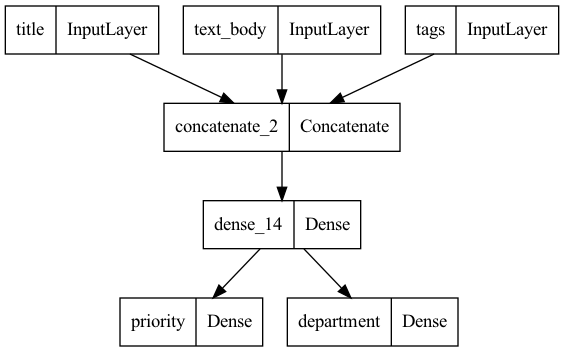

In [33]:
keras.utils.plot_model(model, "ticket_classifier.png")

In [34]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 2ms/step


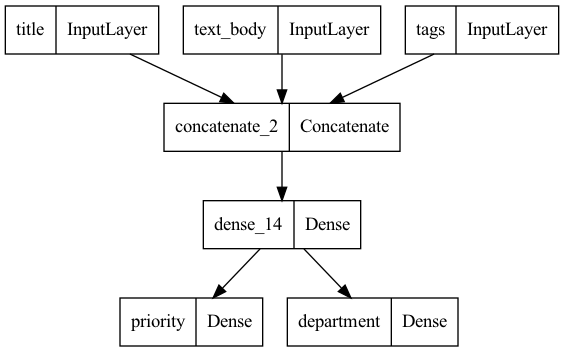

In [35]:
keras.utils.plot_model(model, "ticket_classifier_1.png")

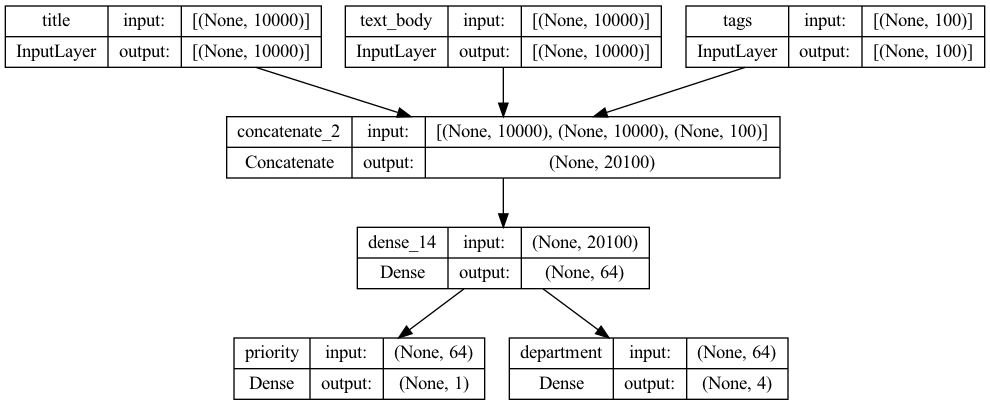

In [36]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [37]:
model.layers

In [38]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [39]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_2')>

In [40]:
# 重复使用中间层的输出，创建一个新模型
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, department, difficulty])

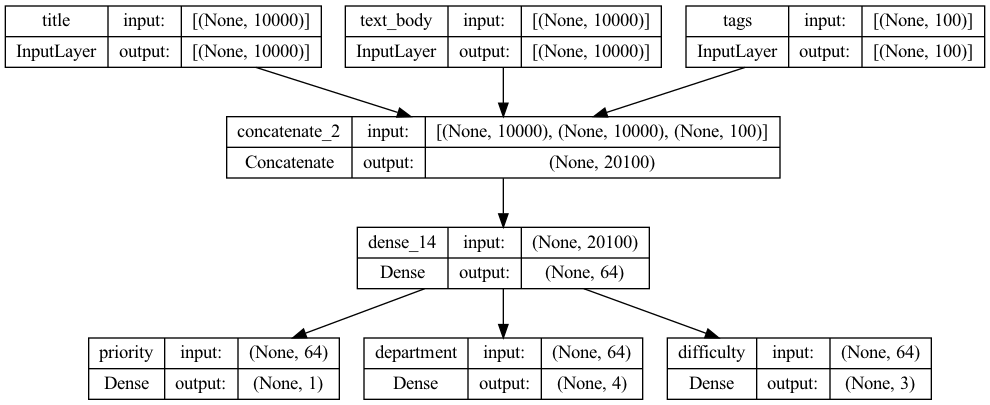

In [41]:
keras.utils.plot_model(new_model, "update_ticket_classifier.png", show_shapes=True)

### 模型子类化

In [48]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()  #不要忘记调用super()构造函数！
        self.concat_layer = layers.Concatenate()  #(本行及以下3行)在构造函数中定义子层
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):  #在call()方法中定义前向传播
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [49]:
# 将模型实例化
model = CustomerTicketModel(num_departments=4)

priority, department = model({"title":title_data, "text_body":text_body_data, "tags": tags_data})

In [58]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],  # (本行及以下1行)参数loss和metrics的结构必须与call()返回的内容完全匹配——这里是两个元素组成的列表
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,  #(本行及以下2行)输入数据的结构必须与call()方法的输入完全匹配——这里是一个字典，字典的键是title、text_body和tags
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data], #目标数据的结构必须与call()方法返回的内容完全匹配——这里是两个元素组成的列表
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


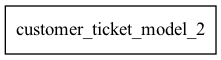

In [59]:
keras.utils.plot_model(model, "CustomerTicketModel.png", show_shapes=True)

## 使用内置的训练循环和评估循环
#### 标准工作流程：compile()、fit()、evaluate()、predict() 

In [61]:
from tensorflow.keras.datasets import mnist

In [66]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32")/255
test_images = test_images.reshape((10000, 28*28)).astype("float32")/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.9128 - val_loss: 0.1514 - val_accuracy: 0.9564
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9539 - val_loss: 0.1236 - val_accuracy: 0.9665
Epoch 3/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1364 - accuracy: 0.9628 - val_loss: 0.1152 - val_accuracy: 0.9695


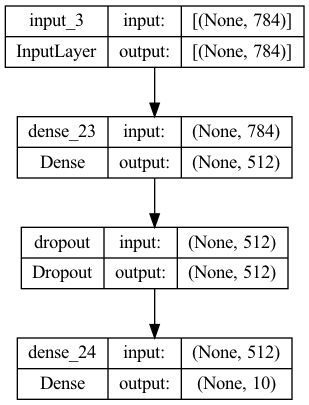

In [67]:
keras.utils.plot_model(model, "keras_mninst.png", show_shapes=True)

In [68]:
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [69]:
callbacks_list = [  #通过fit()的callbacks参数将回调函数传入模型中，该参数接收一个回调函数列表，可以传入任意数量的回调函数
    keras.callbacks.EarlyStopping(  #如果不再改善，则中断训练
        monitor="val_accuracy",  #监控模型的验证精度
        patience=2,  #如果精度在两轮内都不再改善，则中断训练
    ),
    keras.callbacks.ModelCheckpoint(  #在每轮过后保存当前权重
        filepath="checkpoint_path.keras",  #模型文件的保存路径
        monitor="val_loss",  #(本行及以下1行)这两个参数的含义是，只有当val_loss改善时，才会覆盖模型文件，这样就可以一直保存训练过程中的最佳模型
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])  #监控精度，它应该是模型指标的一部分
model.fit(train_images, train_labels,  # (本行及以下3行)因为回调函数要监控验证损失和验证指标，所以在调用fit()时需要传入validation_data（验证数据）
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9114 - val_loss: 0.1516 - val_accuracy: 0.9580
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1663 - accuracy: 0.9536 - val_loss: 0.1194 - val_accuracy: 0.9671
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9625 - val_loss: 0.1285 - val_accuracy: 0.9670
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9668 - val_loss: 0.1077 - val_accuracy: 0.9731
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1173 - accuracy: 0.9699 - val_loss: 0.1112 - val_accuracy: 0.9735
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9726 - val_loss: 0.1166 - val_accuracy: 0.9746
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1072 - accuracy: 0.9745 - val_loss: 0.1254 - val_accuracy:

#### 编写自定义调函数

In [71]:
import matplotlib.pyplot as plt

In [72]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
        
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
        
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.9126 - val_loss: 0.1638 - val_accuracy: 0.9549
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1669 - accuracy: 0.9533 - val_loss: 0.1220 - val_accuracy: 0.9663
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1430 - accuracy: 0.9619 - val_loss: 0.1075 - val_accuracy: 0.9723
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1264 - accuracy: 0.9668 - val_loss: 0.1096 - val_accuracy: 0.9739
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1189 - accuracy: 0.9708 - val_loss: 0.1128 - val_accuracy: 0.9735
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1126 - accuracy: 0.9731 - val_loss: 0.1128 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1053 - accuracy: 0.9750 - val_loss: 0.1188 - val_accuracy:

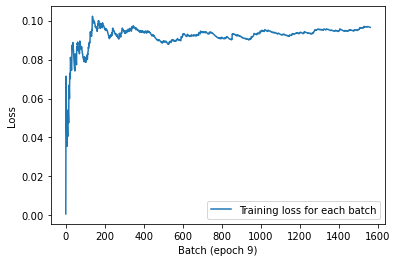

In [73]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 　利用TensorBoard进行监控和可视化

In [75]:
!pip show tensorboard

Name: tensorboard
Version: 2.9.1
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/dayao/opt/anaconda3/lib/python3.9/site-packages
Requires: tensorboard-data-server, tensorboard-plugin-wit, werkzeug, protobuf, markdown, numpy, grpcio, google-auth-oauthlib, setuptools, absl-py, wheel, requests, google-auth
Required-by: tensorflow


In [80]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9119 - val_loss: 0.1507 - val_accuracy: 0.9565
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1668 - accuracy: 0.9533 - val_loss: 0.1235 - val_accuracy: 0.9671
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1390 - accuracy: 0.9616 - val_loss: 0.1188 - val_accuracy: 0.9708
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1256 - accuracy: 0.9673 - val_loss: 0.1145 - val_accuracy: 0.9715
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1173 - accuracy: 0.9716 - val_loss: 0.1113 - val_accuracy: 0.9732
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9732 - val_loss: 0.1176 - val_accuracy: 0.9741
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1031 - accuracy: 0.9753 - val_loss: 0.1111 - val_accuracy:

In [83]:
%load_ext tensorboard
%tensorboard --logdir full_path_to_your_log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 38951), started 1 day, 11:03:03 ago. (Use '!kill 38951' to kill it.)